In [ ]:
from torch import nn
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import datasets
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.transforms.functional import crop
import cv2
import matplotlib.pyplot as plt
import time
import torch
from torch.nn import *

In [ ]:
def crop_r(image):
    return crop(image, 4, 124, 124, 124)
    
def crop_l(image):
    return crop(image, 4, 4, 124, 124)  
    
transform_right = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_r),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])
transform_left = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_l),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])

In [ ]:
train_path = '/content/drive/MyDrive/Datasets/KITTI/05'
batch_size = 1

train_r = datasets.ImageFolder(train_path, transform_right)
train_l = datasets.ImageFolder(train_path, transform_left)

train_loader_r = torch.utils.data.DataLoader(train_r, batch_size)
train_loader_l = torch.utils.data.DataLoader(train_l, batch_size)


In [ ]:
model = models.vgg16(pretrained=True)
layer = 0
for c in model.children():
  layer += 1
  if layer < 3:
    for param in c.parameters():
      param.requires_grad = False

model_weights =[]
conv_layers = []
model_children = list(model.children())
counter = 0
cl = [0,2,5,7,10,12,14,17,19,21,24,26,28]
for i in range(len(model_children)):
    if type(model_children[i]) == nn.modules.container.Sequential:
        print('ok')
        for j in range(len(model_children[i])):
            
            if type(model_children[i][j]) == Conv2d:
                print(model_children[i][j])
                counter+=1
                model_weights.append(model_children[i][j].weight)
                conv_layers.append(model_children[i][j])
print(f"Total convolution layers: {counter}")
print("conv_layers")

top1 = nn.Sequential(
    nn.Linear(in_features=25088, out_features=4096, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=4096, out_features=4096, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=4096, out_features=1000, bias=True)
)

top2 = nn.Sequential(
    nn.Linear(in_features=4096, out_features=256, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.4),
    nn.Linear(in_features=256, out_features=2, bias=True),
)

model.classifier = top1
model.classifier[6] = top2
model

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ok
Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ok
Total convolution layers: 13
conv_layers


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
PATH = '/content/drive/MyDrive/office_gazebo_v7/model.pt'
#model = LoopClosure()
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
output_ = []
inicio = 7920
inicio1 = 7921
fim = 8140
nome_tensor = 37

In [ ]:
for i, data in enumerate(train_loader_r):
    if i > inicio:
        inputs, labels = data
        output1 = model.features[4](model.features[3](model.features[2](model.features[1](model.features[0](inputs)))))
        output2 = model.features[9](model.features[8](model.features[7](model.features[6](model.features[5](output1)))))
        output3 = model.features[12](model.features[11](model.features[10](output2)))
        output4 = model.features[17](model.features[16](model.features[15](model.features[14](model.features[13](output3)))))
        output5 = model.features[22](model.features[21](model.features[20](model.features[19](model.features[18](output4)))))
        output6 = model.features[30](model.features[29](model.features[28](model.features[27](model.features[26](model.features[25](model.features[24](model.features[23](output5))))))))
        output7 = torch.flatten(model.avgpool(output6),1)
        output8 = model.classifier[6][0](model.classifier[5](model.classifier[4](model.classifier[3](model.classifier[2](model.classifier[1](model.classifier[0](output7)))))))
        output_.append(output8)
        if i > fim:
            break


In [ ]:
for i,data in enumerate(train_loader_l):
    if i > inicio:
        inputs, labels = data
        output1 = model.features[4](model.features[3](model.features[2](model.features[1](model.features[0](inputs)))))
        output2 = model.features[9](model.features[8](model.features[7](model.features[6](model.features[5](output1)))))
        output3 = model.features[12](model.features[11](model.features[10](output2)))
        output4 = model.features[17](model.features[16](model.features[15](model.features[14](model.features[13](output3)))))
        output5 = model.features[22](model.features[21](model.features[20](model.features[19](model.features[18](output4)))))
        output6 = model.features[30](model.features[29](model.features[28](model.features[27](model.features[26](model.features[25](model.features[24](model.features[23](output5))))))))
        output7 = torch.flatten(model.avgpool(output6),1)
        output8 = model.classifier[6][0](model.classifier[5](model.classifier[4](model.classifier[3](model.classifier[2](model.classifier[1](model.classifier[0](output7)))))))
        output_[i-inicio1] = torch.cat((output_[i-inicio1], output8), 1)
        if i > fim:
            break
out_path = '/content/drive/MyDrive/Datasets/tensors_kitti_08_vgg16/tensors'+str(nome_tensor)+'.pt'
torch.save(output_,out_path)

In [ ]:
def match(cam_img, db_img, dist_limit):
    distance = torch.cdist(cam_img, db_img, p=2)
    max_dist = torch.max(distance)
    if max_dist <= dist_limit:
        return True
    
    return False

In [ ]:
def belief_generation(db, descriptor):
    belief = []
    lp = 0
    for d in db:
        bg = match(descriptor, d, 4.5)
        if bg:
            belief.append(1)
        else:
            belief = []
        if len(belief) >= 3:
            print('loop')
            print(d)
            lp += 1
    return lp

In [ ]:
database = [database1,database2,database3,database4,database5,database6,database7,database8,database9,database10,
            database11,database12,database13,database14,database15,database16,database17,database18,database19,database20,
            database21,database22,database23,database24,database25,database26,database27,database28,database29,database30,
            database31,database32,database33,database34,database35,database36,database37]
d = []

In [ ]:
co = 0
for bg in database:
  co += 1
  for i,data in enumerate(bg):
    if i < 3:
      d.append(data)
    else:
      loop_ = belief_generation(d, data)
      with open('/content/drive/MyDrive/Datasets/KITTI/loop_kitti_08_vgg16_v3.txt', 'a') as txt_file:
        if loop_ > 0:
          txt_file.write('Found loop')
          image_number = round(((co*200)+i)/2,0)
          txt_file.write('\n image: '+str(image_number))
          txt_file.write('\n')
        else:
          d.append(data)



A saída de streaming foi truncada nas últimas 5000 linhas.
loop
tensor([[-1.2448e-01,  1.0379e-01, -2.6307e-01, -5.5447e-01, -1.8886e-01,
         -6.4821e-01, -3.6471e-01,  8.9443e-01, -1.6884e-01, -2.2761e-01,
          6.9963e-01,  6.5658e-01,  9.0623e-03, -2.1896e-01, -1.5278e-01,
         -5.0357e-02, -8.7821e-02, -4.6034e-02, -2.7819e-01,  5.2411e-02,
         -3.5815e-01, -7.2996e-02, -2.9758e-01, -1.7331e-01,  4.0184e-01,
          3.5294e-02,  1.7830e-01, -4.7414e-01, -4.8886e-01, -3.3678e-02,
         -7.3662e-01, -3.3959e-01, -4.9430e-01, -9.2134e-02, -4.2837e-01,
         -3.1509e-02, -2.8439e-01, -2.1337e-01, -2.2581e-01, -6.8095e-01,
         -7.1836e-02,  1.4959e+00, -1.6695e-01, -1.2899e-01, -1.6497e-01,
         -3.0572e-01, -1.7680e-01,  2.0260e-01,  3.2973e-01, -5.3142e-02,
         -1.4077e-01,  2.5826e-02, -2.4933e-01, -1.6659e-01,  1.3431e+00,
         -2.0551e-01,  1.1533e-01,  8.0457e-02,  9.7267e-01, -1.1176e-01,
         -3.1831e-01, -8.3392e-02,  2.9297e-01, 

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/metricas/kitti_08_vgg16_adaptada_v3.csv')


<Figure size 4320x3456 with 0 Axes>

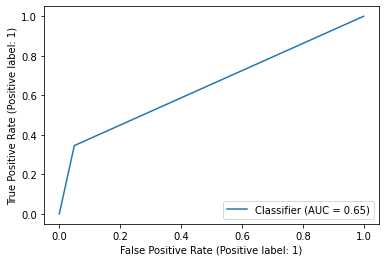

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(60,48))

RocCurveDisplay.from_predictions(df['actual'], df['pred'])
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score


print('AUC: ',roc_auc_score(df['actual'], df['pred']))
print('Accuracy: ',accuracy_score(df['actual'], df['pred']))
print('f1: ',f1_score(df['actual'], df['pred']))



AUC:  0.6481465002999084
Accuracy:  0.9024570024570024
f1:  0.36070853462157804


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df['actual'], df['pred'])

array([[3561,  185],
       [ 212,  112]])